In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys

%load_ext autoreload
%autoreload 2

sys.path.append('../')
import src.read_raw as rr
import src.plot_profiles as pp

/Users/masl3485/Desktop/NGIMS_homopause/env/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
vmrCO2 = 0.949
vmrN2 = 0.0279
vmrAr = 0.0208
N2Ar = (0.37*2)**-1
NAold = (0.51*2)**-1
Vik = (0.3*2)**-1

SAM_ArCO2 = vmrAr/vmrCO2
SAM_ArCO2_a = vmrAr/(vmrCO2+vmrCO2*0.15)
SAM_ArCO2_b = vmrAr/(vmrCO2-vmrCO2*0.15)
print SAM_ArCO2_a, SAM_ArCO2, SAM_ArCO2_b
SAM_N2CO2 = vmrN2/vmrCO2
SAM_N2CO2_a = vmrN2/(vmrCO2+vmrCO2*0.15)
SAM_N2CO2_b = vmrN2/(vmrCO2-vmrCO2*0.15)
print SAM_N2CO2_a, SAM_N2CO2, SAM_N2CO2_b
print N2Ar

0.0190589636689 0.0219178082192 0.0257856567284
0.0255646676135 0.0293993677555 0.0345874914771
1.35135135135


In [6]:
with open('../DD9.dat') as f:
    files = [x.strip() for x in f]
        
bin_df = rr.combine_files(files,io='I')  # inbound only
bin_df_re = rr.realign(bin_df) # convert sp and abun columns to species-specific abunds
bin_df_re = bin_df_re[bin_df_re['orbit']<6974]

In [9]:
bin_df_re[bin_df_re['alt']<130][['lst','lat']]

,lst,lat
316,12.35972,-49.67389
317,12.36556,-49.79860
318,12.37167,-49.92324
319,12.37750,-50.04782
320,12.38361,-50.17234
321,12.38944,-50.29678
322,12.39556,-50.42116
323,12.40167,-50.54547
324,12.40778,-50.66970
325,12.41389,-50.79387


In [4]:
print(bin_df_re['orbit'].unique())
bin_df_re[['alt','orbit','abundance_Ar','abundance_CO2']].head()

[6936 6937 6938 6939 6940 6941 6942 6943 6944 6945 6946 6947 6948 6949 6950
 6951 6952 6953 6954 6955 6956 6957 6958 6959 6960 6961 6962 6963 6964 6965
 6966 6967 6968 6969 6970 6971 6972 6973]


,alt,orbit,abundance_Ar,abundance_CO2
0,460.6511,6936,0.0,-999.0
1,458.8103,6936,0.0,-999.0
2,456.9735,6936,0.0,-999.0
3,455.1407,6936,0.0,-999.0
4,453.3119,6936,0.0,-999.0


In [5]:
print bin_df_re[['lat','sza','lst']][bin_df_re['alt']<130].mean()
#bin_df_re[['alt','abundance_Ar','abundance_CO2','abundance_N2','orbit']].to_csv('/Users/masl3485/Desktop/DD9_NGIMS_abundances.csv')

lat   -47.077729
sza    53.008950
lst    11.963191
dtype: float64


In [36]:
bin_df_re['N2/Ar'] = bin_df_re['abundance_N2']/bin_df_re['abundance_Ar']
bin_df_re['N2/CO2'] = bin_df_re['abundance_N2']/bin_df_re['abundance_CO2']
bin_df_re['Ar/CO2'] = bin_df_re['abundance_Ar']/bin_df_re['abundance_CO2']
bins = np.arange(bin_df_re['alt'].min(),300,5)
bin_mid = (bins[1:]+bins[:-1])/2.
bin_df_re['bin_alt'] = pd.cut(bin_df_re['alt'],bins,labels=bin_mid)
bin_mean = bin_df_re[['bin_alt','alt','N2/Ar','N2/CO2','Ar/CO2','abundance_CO2','abundance_N2','abundance_O']].groupby('bin_alt').mean()
bin_std = bin_df_re[['bin_alt','alt','N2/Ar','N2/CO2','Ar/CO2','abundance_CO2','abundance_N2','abundance_O']].groupby('bin_alt').std()
binned = pd.merge(bin_mean.reset_index(),bin_std.reset_index(),on='bin_alt',suffixes=['_mean','_std']).drop('alt_std',axis=1)
binned.sort_values('bin_alt').head()
binned.to_csv('/Users/masl3485/Desktop/DD9_binned.csv',index=False)

In [37]:
cov = np.sqrt(bin_df_re[['bin_alt','abundance_Ar','abundance_CO2','abundance_N2']].groupby('bin_alt').cov())
cov = cov.reset_index()
covN2Ar = pd.DataFrame(cov[['bin_alt','abundance_Ar']][(cov['level_1']=='abundance_N2')]).rename(columns={'abundance_Ar':'covN2Ar'})
covN2CO2 = pd.DataFrame(cov[['bin_alt','abundance_CO2']][(cov['level_1']=='abundance_N2')]).rename(columns={'abundance_CO2':'covN2CO2'})
covArCO2 = pd.DataFrame(cov[['bin_alt','abundance_CO2']][(cov['level_1']=='abundance_Ar')]).rename(columns={'abundance_CO2':'covArCO2'})
binned = pd.merge(binned,covN2Ar,on='bin_alt')
binned = pd.merge(binned,covN2CO2,on='bin_alt')
binned = pd.merge(binned,covArCO2,on='bin_alt')

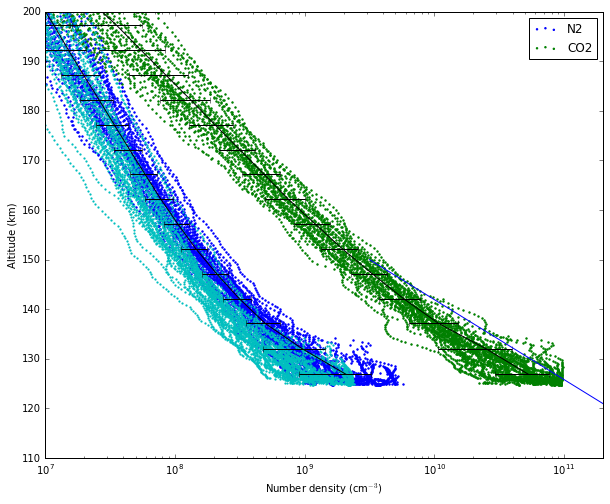

In [41]:
alldax = pp.density_plot(bin_df_re,species=['N2','CO2'])
alldax.figure.set_size_inches(10,8)
alldax.set_ylim(110,200)
alldax.set_xlim(1.e+7,2.e+11)
#alldax.errorbar(binned['abundance_Ar_mean'],binned['alt_mean'],xerr=binned['abundance_Ar_std'],color='k')
alldax.errorbar(binned['abundance_N2_mean'],binned['alt_mean'],xerr=binned['abundance_N2_std'],color='k')
alldax.errorbar(binned['abundance_CO2_mean'],binned['alt_mean'],xerr=binned['abundance_CO2_std'],color='k')
alldax.plot(CO2,alts)
alldax.scatter(bin_df_re['abundance_O'],bin_df_re['alt'],c='c',s=5,lw=0)
plt.show()

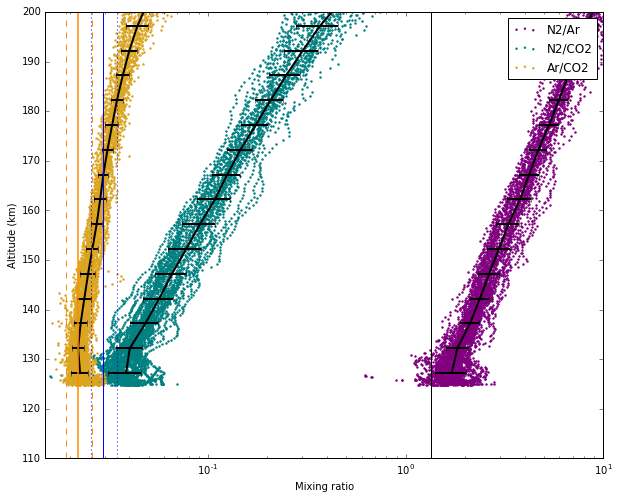

In [156]:
allmax = pp.mixing_plot(bin_df_re)

#allmax.errorbar(binned['abundance_N2_mean']/binned['abundance_Ar_mean'],binned['bin_alt'],
#                xerr=binned['abundance_N2_mean']/binned['abundance_Ar_mean']*np.sqrt((binned['abundance_N2_std']/binned['abundance_N2_mean'])**2+\
#                                                                                     (binned['abundance_Ar_std']/binned['abundance_Ar_mean'])**2-\
#                                                                                    2*(binned['covN2Ar']/(binned['abundance_Ar_mean']*binned['abundance_N2_mean']))),
#                color='k')
#allmax.errorbar(binned['abundance_N2_mean']/binned['abundance_CO2_mean'],binned['bin_alt'],
#                xerr=binned['abundance_N2_mean']/binned['abundance_CO2_mean']*np.sqrt((binned['abundance_CO2_std']/binned['abundance_CO2_mean'])**2+(binned['abundance_Ar_std']/binned['abundance_Ar_mean'])**2),color='k')
#allmax.errorbar(binned['abundance_Ar_mean']/binned['abundance_CO2_mean'],binned['bin_alt'],
#                xerr=binned['abundance_Ar_mean']/binned['abundance_CO2_mean']*np.sqrt((binned['abundance_Ar_std']/binned['abundance_Ar_mean'])**2+(binned['abundance_CO2_std']/binned['abundance_CO2_mean'])**2),color='k')

#allmax.plot(binned['abundance_N2_mean']/binned['abundance_Ar_mean'],binned['bin_alt'],'k-')
#allmax.plot(binned['abundance_N2_mean']/binned['abundance_CO2_mean'],binned['bin_alt'],'k-')
#allmax.plot(binned['abundance_Ar_mean']/binned['abundance_CO2_mean'],binned['bin_alt'],'k-')

allmax.errorbar(binned['N2/Ar_mean'],binned['bin_alt'],xerr=binned['N2/Ar_std'],color='k',lw=2)
allmax.errorbar(binned['N2/CO2_mean'],binned['bin_alt'],xerr=binned['N2/CO2_std'],color='k',lw=2)
allmax.errorbar(binned['Ar/CO2_mean'],binned['bin_alt'],xerr=binned['Ar/CO2_std'],color='k',lw=2)


allmax.figure.set_size_inches(10,8)
allmax.set_ylim(110,200)
allmax.set_xlim(1.5e-2,1.e+1)

allmax.plot([N2Ar,N2Ar],[110,200],'k-')
#allmax.plot([NAold,NAold],[110,200],'k--',lw=0.5)
#allmax.plot([Vik,Vik],[110,200],'k--',lw=0.5)

allmax.plot([SAM_ArCO2,SAM_ArCO2],[110,200],color='darkorange',ls='-',lw=1.5)
allmax.plot([SAM_ArCO2_a,SAM_ArCO2_a],[110,200],color='darkorange',ls='--',lw=1)
allmax.plot([SAM_ArCO2_b,SAM_ArCO2_b],[110,200],color='darkorange',ls='--',lw=1)

allmax.plot([SAM_N2CO2,SAM_N2CO2],[110,200],'b-',1.5)
allmax.plot([SAM_N2CO2_a,SAM_N2CO2_a],[110,200],'b:',lw=1)
allmax.plot([SAM_N2CO2_b,SAM_N2CO2_b],[110,200],'b:',lw=1)

#plt.savefig('/Users/masl3485/Desktop/DD9_raw.png',dpi=100)

plt.show()

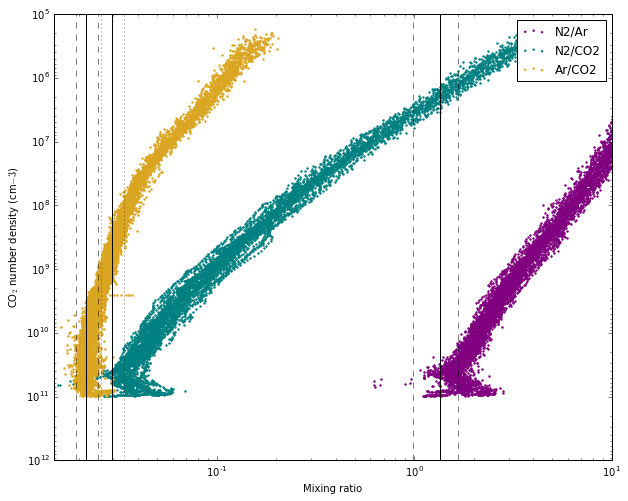

In [47]:
allmax = pp.mixing_plot(bin_df_re,yaxis='den')
allmax.figure.set_size_inches(10,8)
allmax.set_ylim(1.e+12,1.e+5)
allmax.set_xlim(1.5e-2,1.e+1)

allmax.plot([N2Ar,N2Ar],[1.e+12,1.e+5],'k-')
allmax.plot([NAold,NAold],[1.e+12,1.e+5],'k--',lw=0.5)
allmax.plot([Vik,Vik],[1.e+12,1.e+5],'k--',lw=0.5)

allmax.plot([SAM_ArCO2,SAM_ArCO2],[1.e+12,1.e+5],'k-')
allmax.plot([SAM_ArCO2_a,SAM_ArCO2_a],[1.e+12,1.e+5],'k--',lw=0.5)
allmax.plot([SAM_ArCO2_b,SAM_ArCO2_b],[1.e+12,1.e+5],'k--',lw=0.5)

allmax.plot([SAM_N2CO2,SAM_N2CO2],[1.e+12,1.e+5],'k-')
allmax.plot([SAM_N2CO2_a,SAM_N2CO2_a],[1.e+12,1.e+5],'k:',lw=0.5)
allmax.plot([SAM_N2CO2_b,SAM_N2CO2_b],[1.e+12,1.e+5],'k:',lw=0.5)

plt.show()

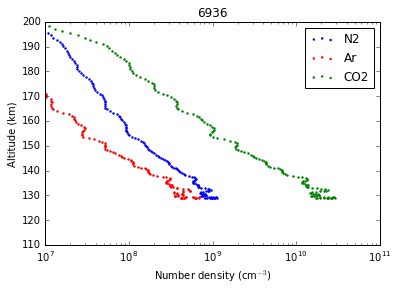

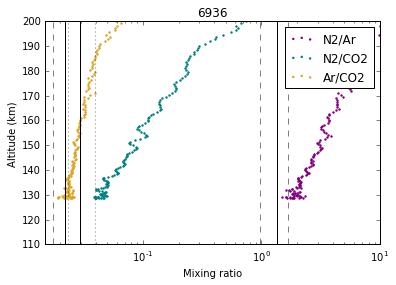

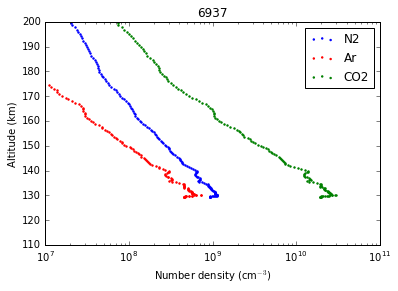

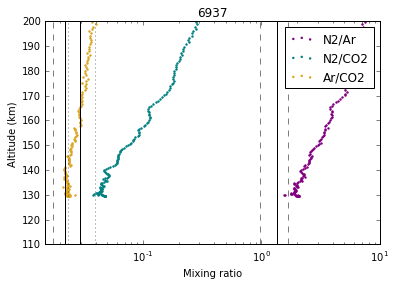

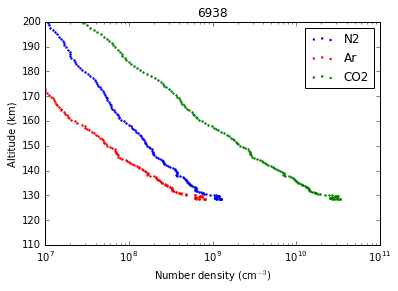

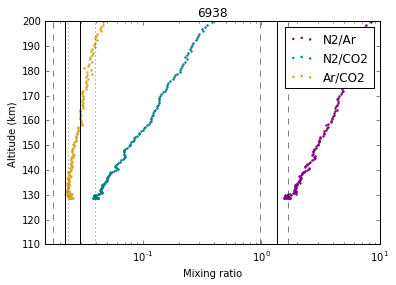

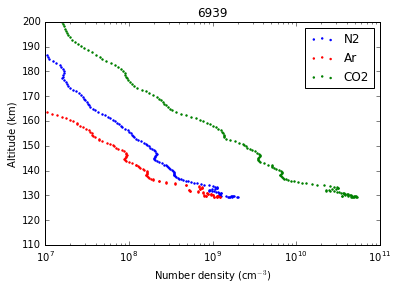

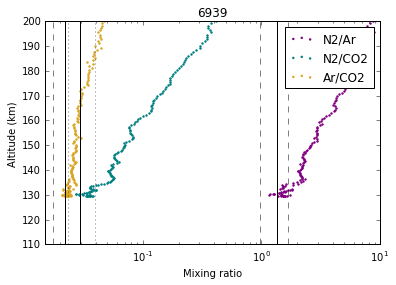

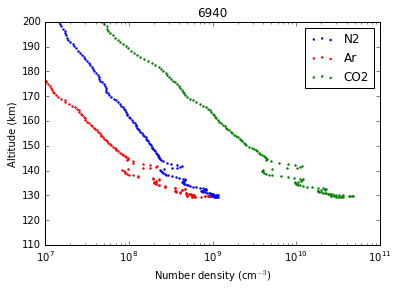

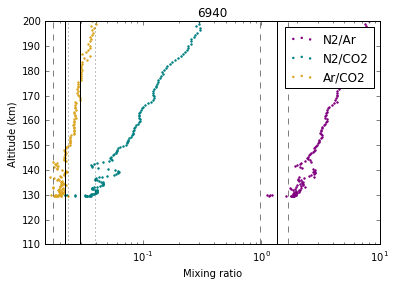

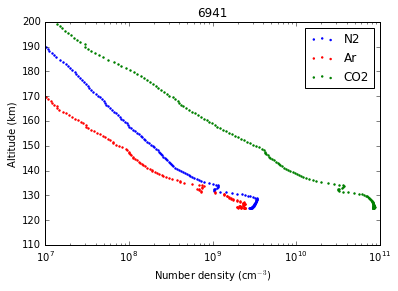

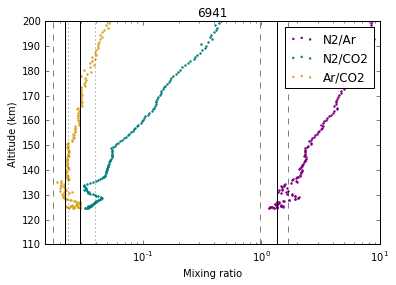

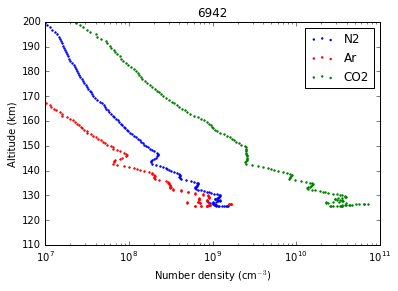

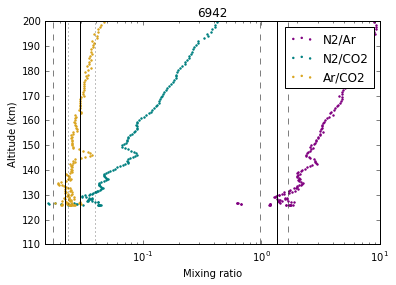

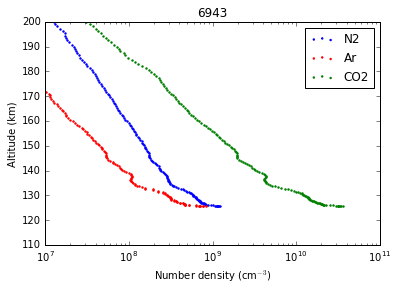

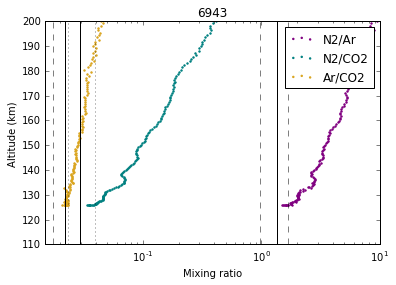

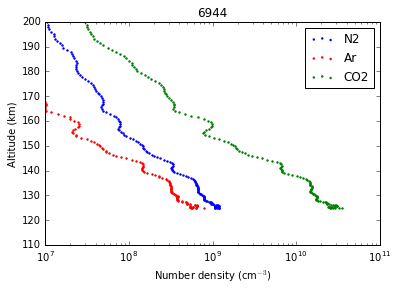

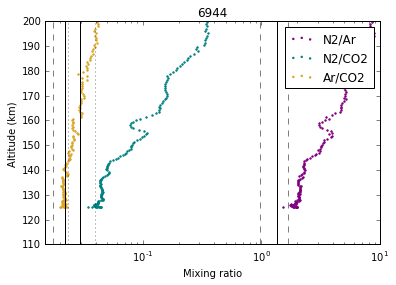

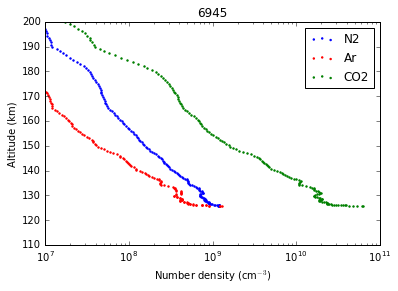

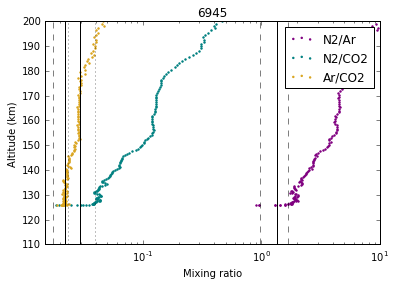

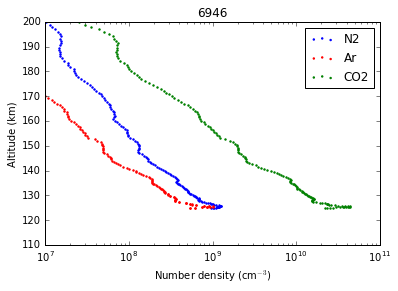

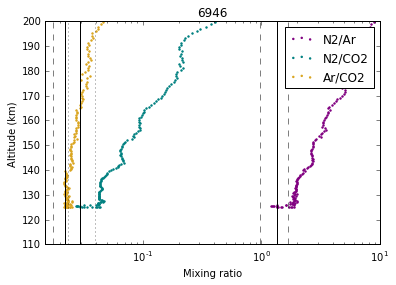

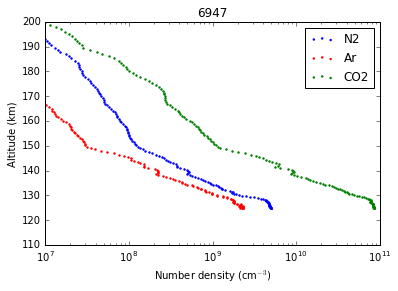

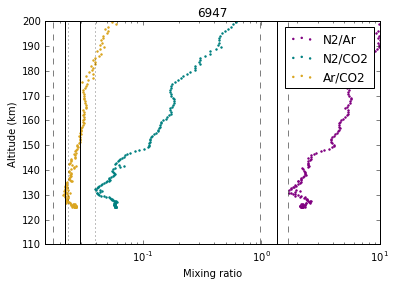

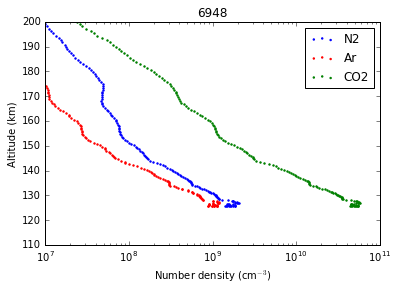

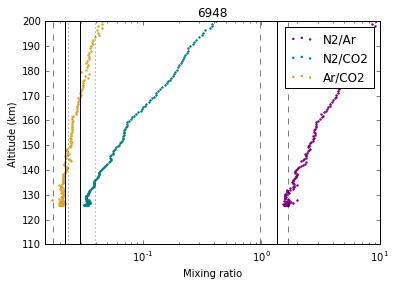

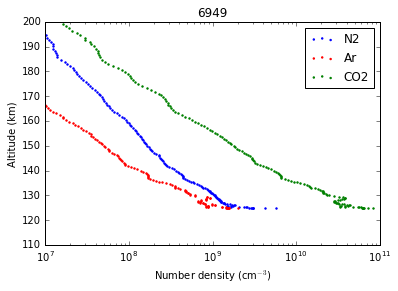

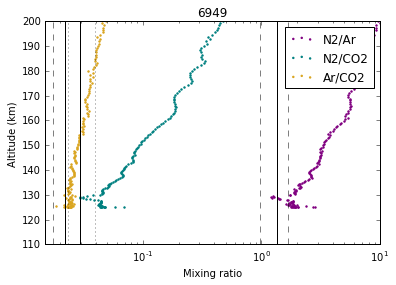

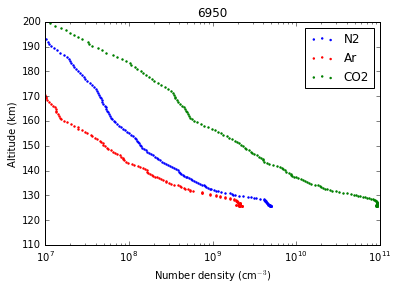

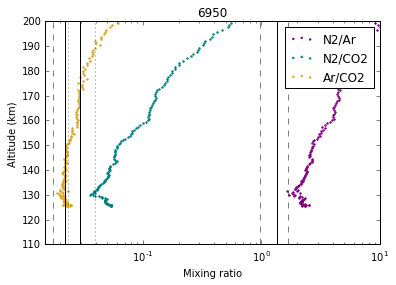

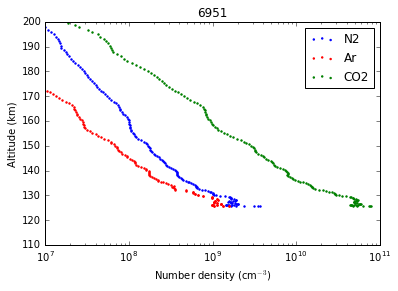

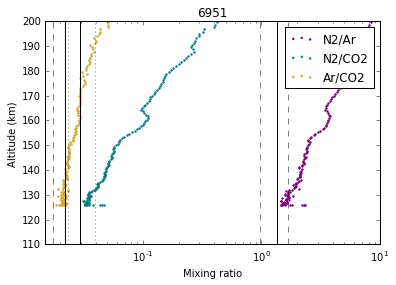

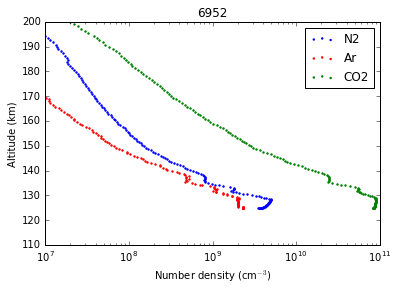

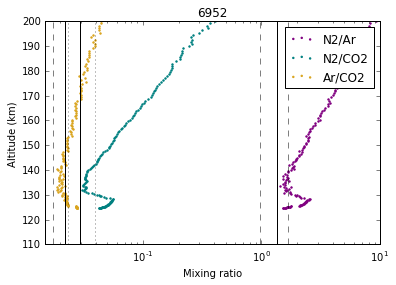

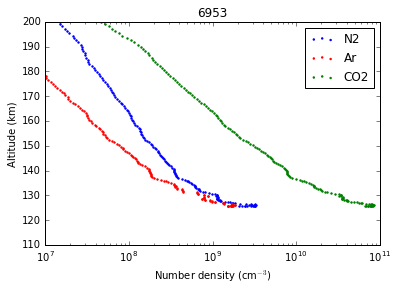

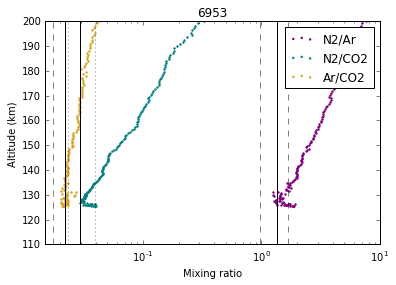

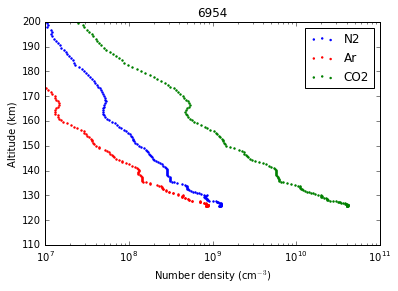

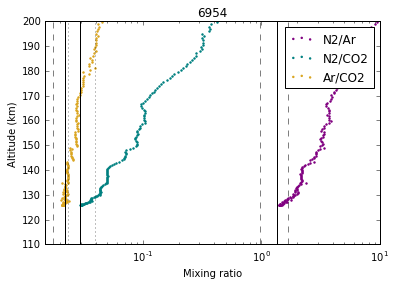

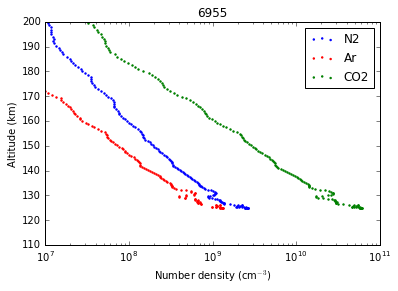

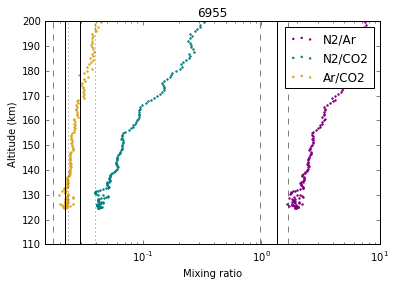

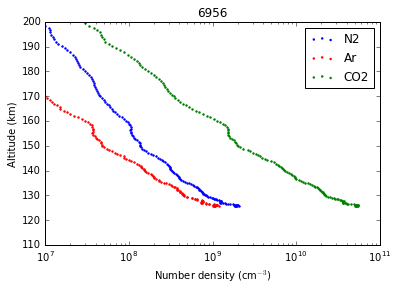

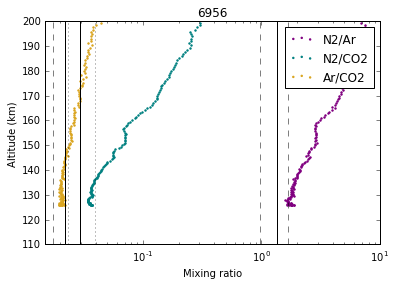

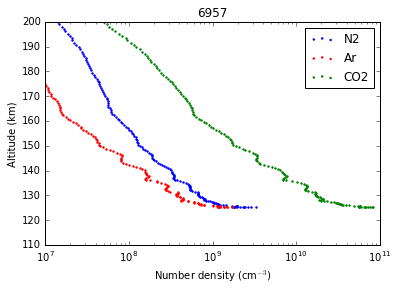

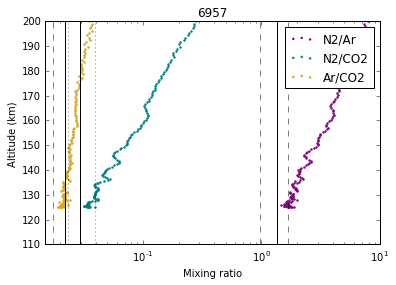

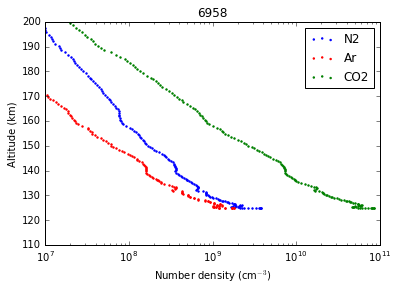

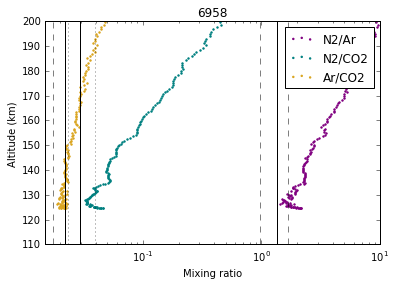

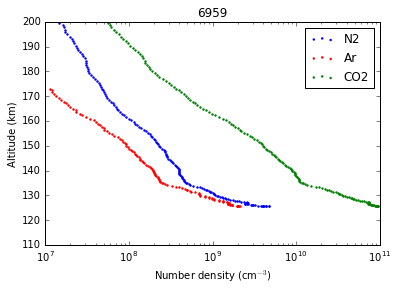

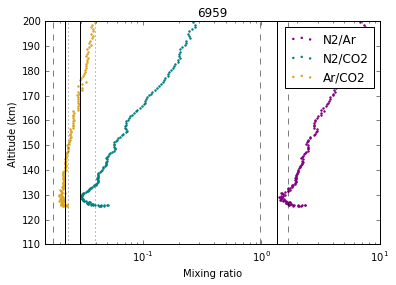

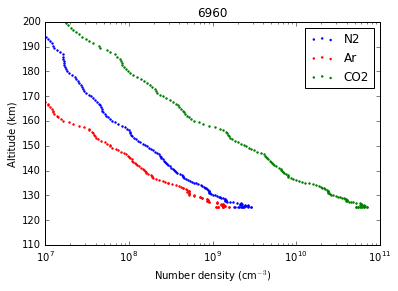

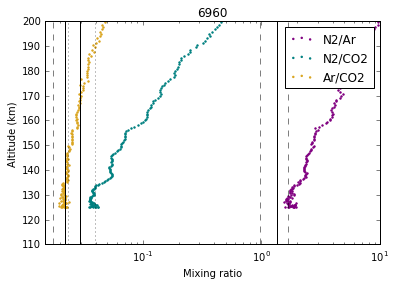

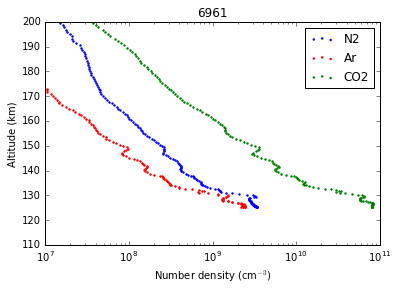

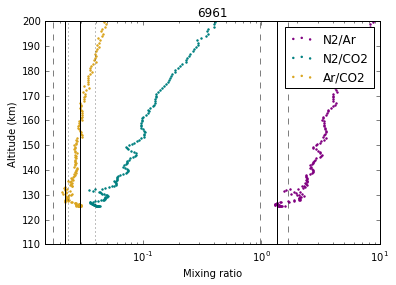

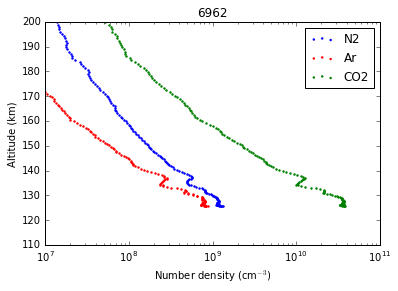

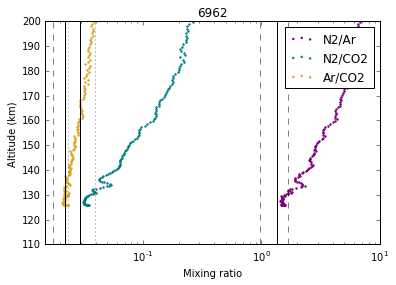

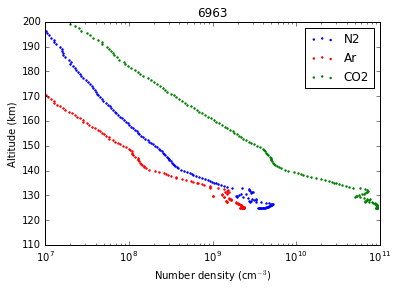

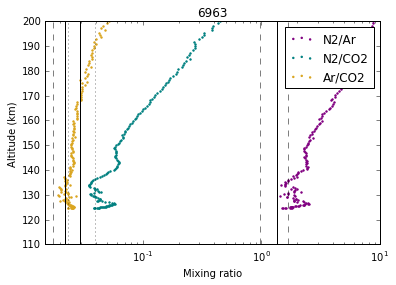

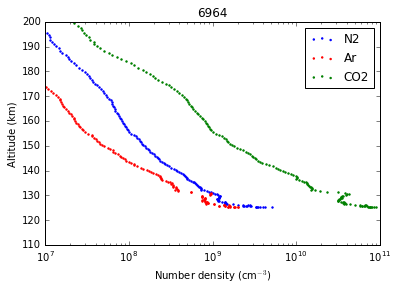

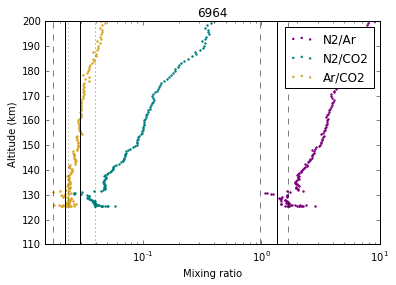

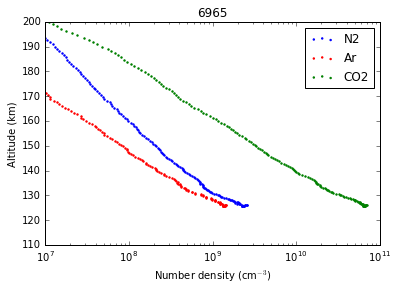

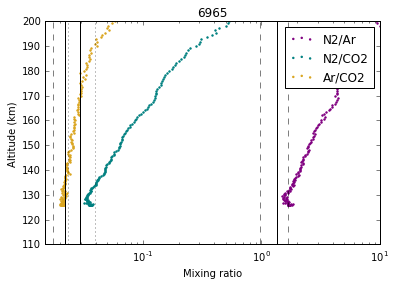

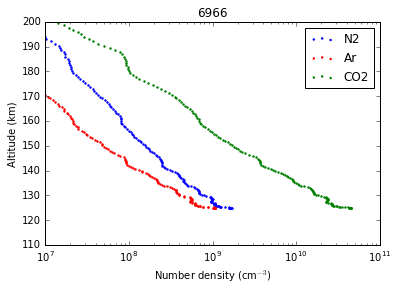

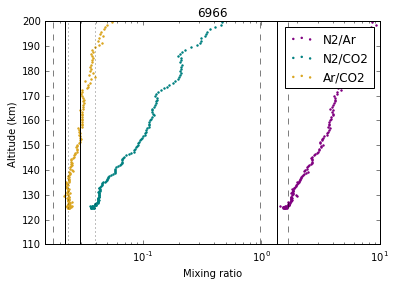

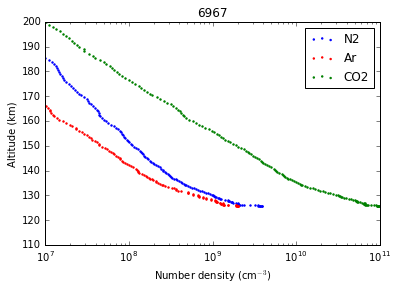

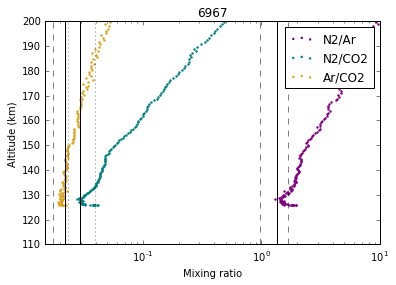

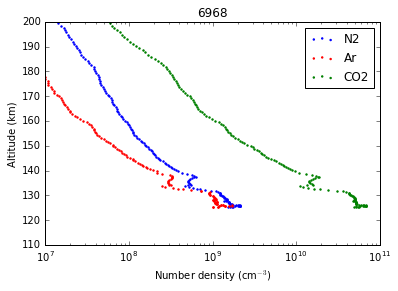

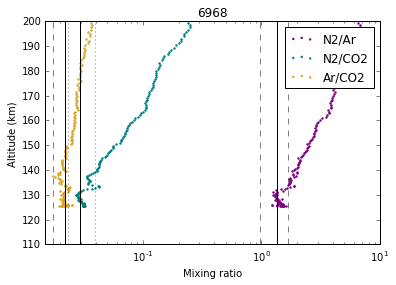

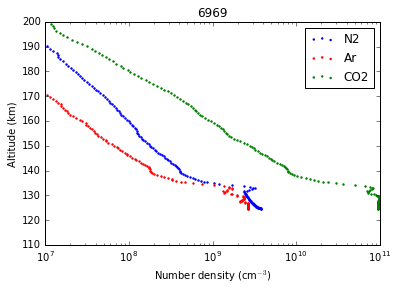

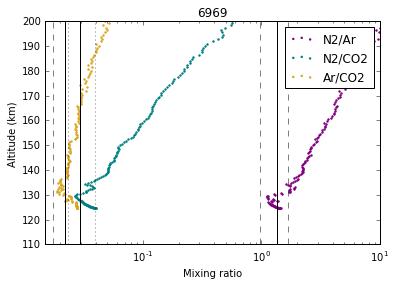

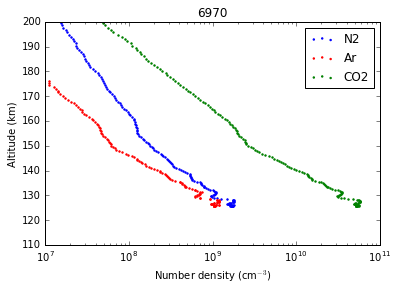

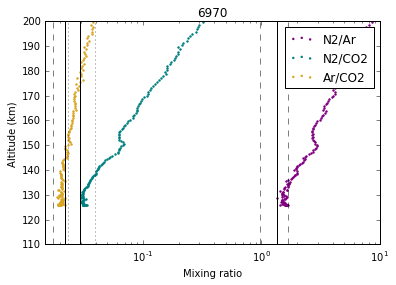

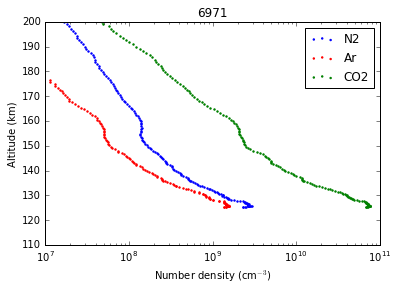

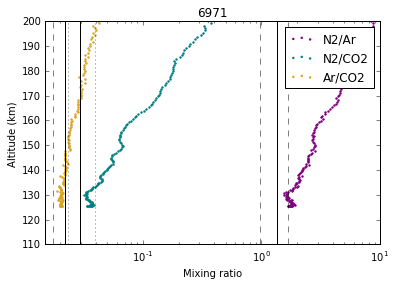

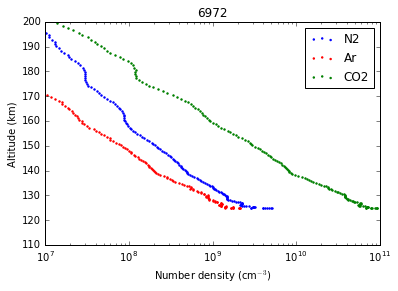

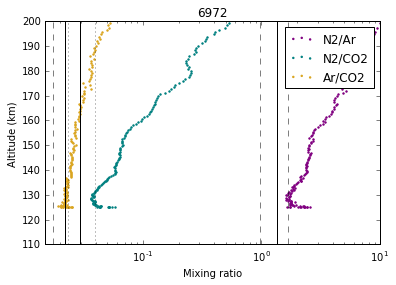

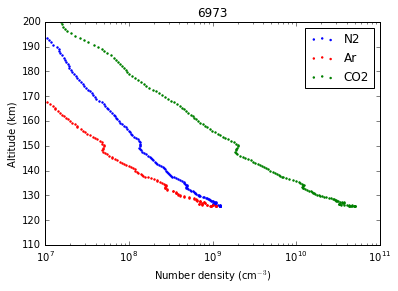

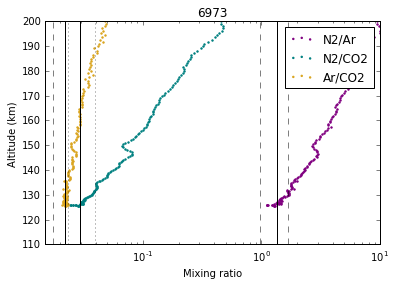

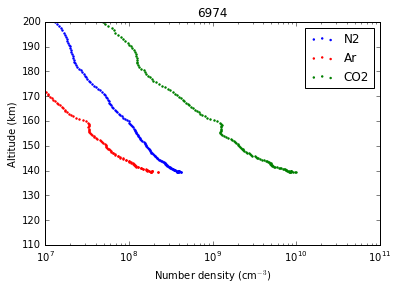

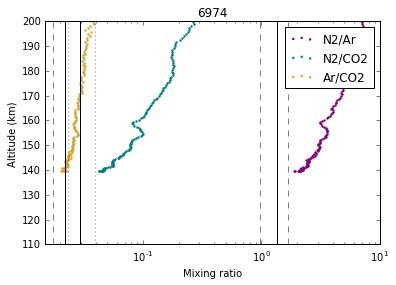

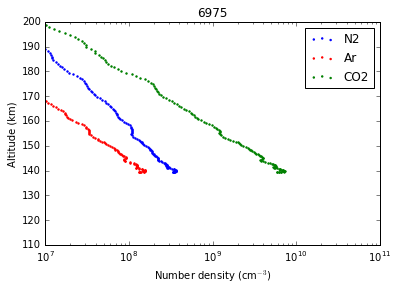

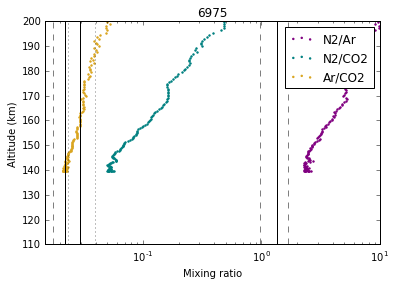

In [34]:
for orb, orbg in bin_df_re.groupby('orbit'):
    denax = pp.density_plot(orbg)
    denax.set_title(str(orb))
    denax.set_ylim(110,200)
    denax.set_xlim(1.e+7,1.e+11)
    mrax = pp.mixing_plot(orbg)
    mrax.set_title(str(orb))
    mrax.set_ylim(110,200)
    mrax.set_xlim(1.5e-2,1.e+1)
    
    mrax.plot([N2Ar,N2Ar],[110,200],'k-')
    mrax.plot([NAold,NAold],[110,200],'k--',lw=0.5)
    mrax.plot([Vik,Vik],[110,200],'k--',lw=0.5)
    
    mrax.plot([SAM_ArCO2,SAM_ArCO2],[110,200],'k-')
    mrax.plot([SAM_ArCO2_a,SAM_ArCO2_a],[110,200],'k--',lw=0.5)
    mrax.plot([SAM_ArCO2_b,SAM_ArCO2_b],[110,200],'k--',lw=0.5)
    
    mrax.plot([SAM_N2CO2,SAM_N2CO2],[110,200],'k-')
    mrax.plot([SAM_N2CO2_a,SAM_N2CO2_a],[110,200],'k:',lw=0.5)
    mrax.plot([SAM_N2CO2_b,SAM_N2CO2_b],[110,200],'k:',lw=0.5)

In [51]:
def D12(mass1, mass2, temp, concen):
    # amu, amu, K, cm^-3
    #cm^2/s
    return 1.52e+18 * np.sqrt(1/float(mass1) + 1/float(mass2)) * np.sqrt(temp)/concen

def cm2s_m2s(cm2s):
    return cm2s/1.e+4

In [52]:
cm2s_m2s(D12(40,44,200,1.e+10))

46961.492929652683

In [53]:
cm2s_m2s(D12(28,44,200,1.e+10))

51966.02286559491

In [56]:
alts = np.linspace(100,150,100)
CO2 = np.logspace(12.6,9.5,100)
t_alt = np.linspace(100,260,100)

DArCO2 = cm2s_m2s(D12(40,44,t_alt,CO2))
DN2CO2 = cm2s_m2s(D12(28,44,t_alt,CO2))

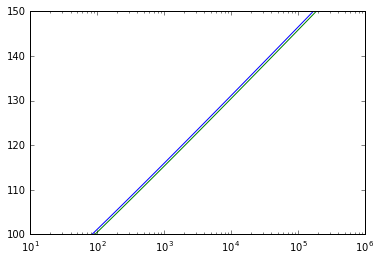

In [57]:
plt.figure()
plt.plot(DArCO2,alts)
plt.plot(DN2CO2,alts)
plt.xscale('log')
plt.show()